In [ ]:
#This is a Student Performance Dataset designed to examine the factors influencing academic student performance.
#In this notebook, I have implemented multiple linear regression from stratch.

In [417]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

In [418]:
data=pd.read_csv(r"C:\Users\shamzkha\Documents\Student_Performance.csv")

In [419]:
data.shape

(10000, 6)

In [420]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [421]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [422]:
#No missing values found

In [423]:
#Renaming the columns

In [424]:
data=data.rename(columns={"Hours Studied":"Hours_Studied"})

In [425]:
data=data.rename(columns={"Previous Scores":"Previous_Scores"})

In [426]:
data=data.rename(columns={"Extracurricular Activities":"Extracurricular_Activities"})

In [427]:
data=data.rename(columns={"Sleep Hours":"Sleep_Hours"})

In [428]:
data=data.rename(columns={"Sample Question Papers Practiced":"SQPP"})

In [429]:
data=data.rename(columns={"Performance Index":"Performance_Index"})

In [430]:
data.dtypes

Hours_Studied                   int64
Previous_Scores                 int64
Extracurricular_Activities     object
Sleep_Hours                     int64
SQPP                            int64
Performance_Index             float64
dtype: object

# Converting categorical value to numerical value

In [432]:
data.Extracurricular_Activities=le.fit_transform(data.Extracurricular_Activities)

In [433]:
#data.dtypes

# EDA

In [435]:
#The target column performance index is numerical so no class imbalance treatment is required

# Outlier Treatment

<Axes: ylabel='Hours_Studied'>

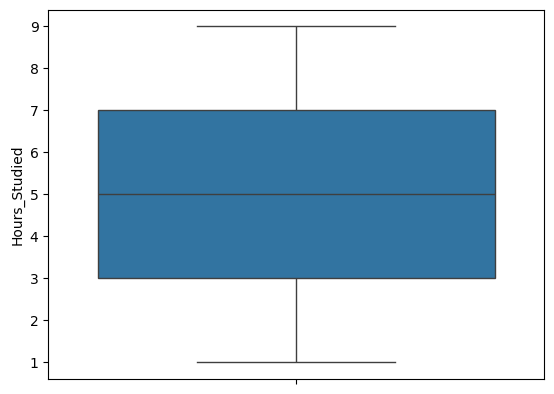

In [437]:
sns.boxplot(data=data,y="Hours_Studied")

<Axes: ylabel='Previous_Scores'>

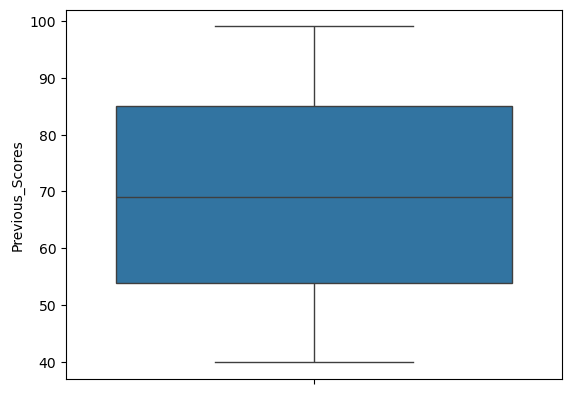

In [438]:
sns.boxplot(data=data,y="Previous_Scores")

<Axes: ylabel='Sleep_Hours'>

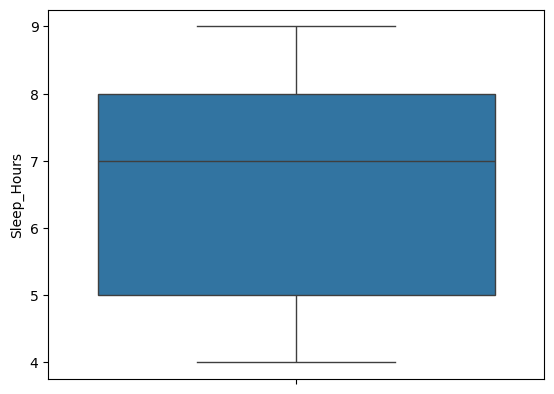

In [439]:
sns.boxplot(data=data,y="Sleep_Hours")

<Axes: ylabel='SQPP'>

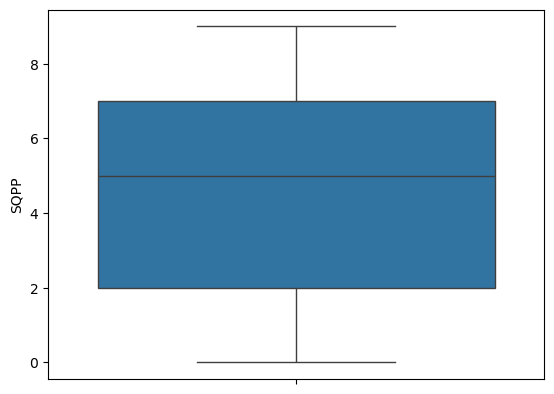

In [440]:
sns.boxplot(data=data,y="SQPP")

In [441]:
#extracurricular activities not checked as it is categorical column

In [442]:
#No outlier ,so no treatment is required

# Correlation

In [444]:
data1=data.corr()
data1

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,SQPP,Performance_Index
Hours_Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous_Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular_Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep_Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
SQPP,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance_Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


In [ ]:
#Conclusion:

#Performance Index is most strongly correlated with Previous Scores (0.915).
#Hours Studied has a moderate, positive correlation with Performance Index (0.374).
#Extracurricular Activities, Sleep Hours, and SQPP show weak correlations with performance.

# Linear Regression

In [446]:
data.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,SQPP,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [447]:
#Separating features from target

In [448]:
x=data.iloc[:,0:5]
#x.head()

In [449]:
y=data.iloc[:,5]
#y.head()

In [450]:
import sklearn
from sklearn.model_selection import train_test_split

In [451]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [452]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [453]:
from sklearn import linear_model

In [454]:
linear=linear_model.LinearRegression()

In [455]:
linear.fit(x_train,y_train)

LinearRegression()

In [456]:
pred=linear.predict(x_test)
pred

array([44.38891422, 96.15853705, 30.52422606, ..., 45.9649391 ,
       59.64558417, 16.80314704])

In [457]:
linear.coef_

array([2.85283863, 1.01817717, 0.63290609, 0.48524068, 0.19369907])

In [458]:
linear.intercept_

-34.10276056362111

In [459]:
R2=linear.score(x_train,y_train) #Rsquare vale
R2

0.9887109739552409

In [460]:
Adj_R2=1-(((1-R2)*(8000-1))/(8000-5-1)) #adjusted Rsquare value
Adj_R2

0.9887039130182602

In [461]:
pred_train=linear.predict(x_train)
#pred_train
pred_train.shape

(8000,)

In [462]:
mean_y=y_train.mean()
mean_y

55.260625

In [463]:
SSE=np.sum(np.square(pred_train-y_train))
SSE

33333.5316344614

In [464]:
SSR=np.sum(np.square(pred_train-mean_y))
SSR

2919404.0652405405

In [465]:
Rsq=SSR/(SSR+SSE) #Rsquare value by formula
Rsq

0.9887109739552408

In [466]:
from sklearn import metrics

In [467]:
#MAE=mean absolute error

In [468]:
MSE=metrics.mean_squared_error(pred,y_test)
MSE

4.091042932500655

In [469]:
RMSE=np.sqrt(MSE)
RMSE

2.0226326736460716

In [470]:
#MAPE=Mean absolute Percentage Error

In [471]:
error=pred-y_test
error
error_abs=np.abs(error)
#error_abs

In [472]:
MAPE=np.mean(error_abs/y_test)*100
MAPE

3.512131434073932

In [473]:
Accuracy=(100-MAPE)
Accuracy

96.48786856592606

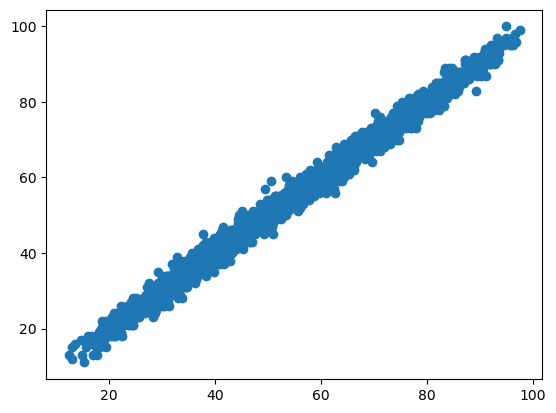

In [474]:
plt.scatter(pred,y_test)
plt.show()

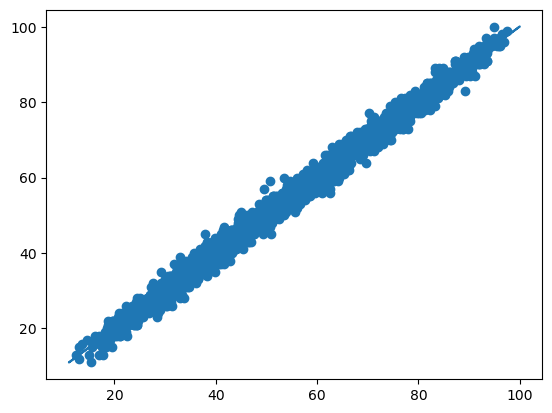

In [475]:
from scipy import stats
slope,intercepts,r,p,std_err=stats.linregress(pred,y_test)
def myfunc(y_test):
    return slope*y_test+intercepts
mymodel=list(map(myfunc,y_test))

plt.scatter(pred,y_test)
plt.plot(y_test,mymodel)
plt.show()

In [ ]:
#Conclusion:

#The linear regression model developed for predicting the dependent variable has demonstrated strong predictive performance, with an accuracy of 96.48%. 
#This indicates that the model is highly effective at making predictions, with minimal error.
#The adjusted R-squared value of 0.988870 suggests that approximately 98.89% of the variance in the dependent variable can be explained by the independent variables in the model.


# L1=Lasso

In [477]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [478]:
lasso.fit(x_train,y_train)

Lasso()

In [479]:
lasso.coef_

array([2.71029613, 1.01484602, 0.        , 0.13493396, 0.07585949])

In [480]:
l1_pred=lasso.predict(x_test)
l1_pred

array([45.53780956, 95.07744207, 31.42387377, ..., 45.41309159,
       60.24373499, 16.69862985])

In [481]:
l1_R2=lasso.score(x_train,y_train) 
l1_R2

0.9867853232610752

In [482]:
l1_adj_R2=1-(((1-l1_R2)*(8000-1))/(8000-5-1))
l1_adj_R2

0.9867770578890843

In [483]:
df=pd.DataFrame({"Feature_importances":lasso.coef_,"columns":list(x)})
df

,Feature_importances,columns
0,2.710296,Hours_Studied
1,1.014846,Previous_Scores
2,0.000000,Extracurricular_Activities
3,0.134934,Sleep_Hours
4,0.075859,SQPP


In [484]:
df2=pd.DataFrame({"Actual":y_test,"Predictions":l1_pred})
df2

,Actual,Predictions
6676,43.0,45.537810
6421,95.0,95.077442
9834,29.0,31.423874
8492,48.0,51.069095
9982,44.0,44.171937
...,...,...
4441,38.0,39.997799
4166,42.0,39.652071
2567,46.0,45.413092
8527,61.0,60.243735


In [485]:
MSE_l1=metrics.mean_squared_error(l1_pred,y_test)
MSE_l1

4.718953466209578

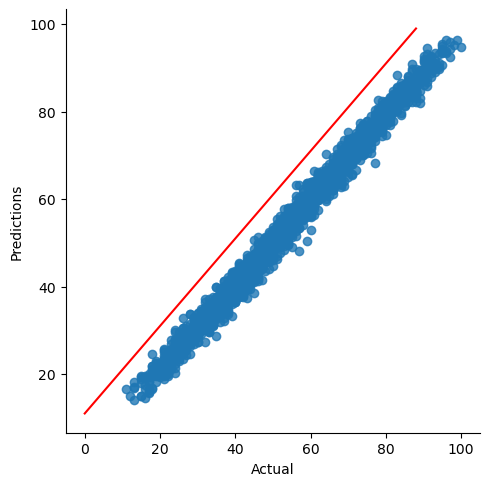

In [486]:
sns.lmplot(x="Actual",y="Predictions",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

# L2=Ridge

In [488]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [489]:
rd.fit(x_train,y_train)

Ridge()

In [490]:
rd_pred=rd.predict(x_test)
rd_pred

array([44.38903204, 96.15814176, 30.52429609, ..., 45.96509303,
       59.64559074, 16.80317541])

In [491]:
list(rd.coef_)

[2.8527862054001183,
 1.0181766862753776,
 0.6325885585926317,
 0.4852177273122147,
 0.1936980544421156]

In [492]:
rd_R2=rd.score(x_train,y_train)
rd_R2

0.9887109738325554

In [493]:
rd_adj_R2=1-(((1-rd_R2)*(8000-1))/(8000-5-1))
rd_adj_R2

0.9887039128954979

In [494]:
df_1=pd.DataFrame({"Feature_importances":rd.coef_,"columns":list(x)})
df_1

,Feature_importances,columns
0,2.852786,Hours_Studied
1,1.018177,Previous_Scores
2,0.632589,Extracurricular_Activities
3,0.485218,Sleep_Hours
4,0.193698,SQPP


In [495]:
df_2=pd.DataFrame({"Actual":y_test,"Predictions":rd_pred})
df_2

,Actual,Predictions
6676,43.0,44.389032
6421,95.0,96.158142
9834,29.0,30.524296
8492,48.0,49.753932
9982,44.0,43.266933
...,...,...
4441,38.0,39.831898
4166,42.0,38.667764
2567,46.0,45.965093
8527,61.0,59.645591


In [496]:
MSE_rd=metrics.mean_squared_error(rd_pred,y_test)
MSE_rd

4.0910252511709615

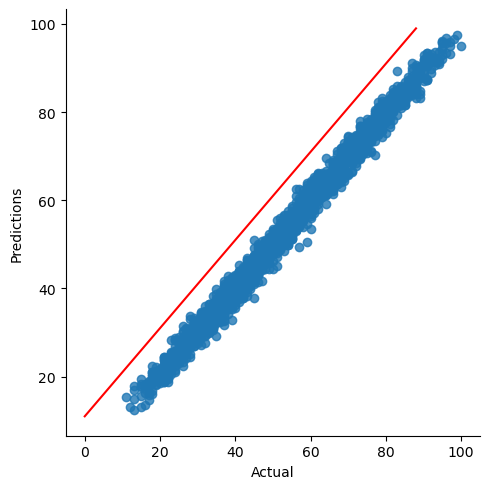

In [497]:
sns.lmplot(x="Actual",y="Predictions",data=df_2,fit_reg=False)
d_line=np.arange(df_2.min().min(),df_2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

# Feature Selection

In [499]:
df

,Feature_importances,columns
0,2.710296,Hours_Studied
1,1.014846,Previous_Scores
2,0.000000,Extracurricular_Activities
3,0.134934,Sleep_Hours
4,0.075859,SQPP


In [500]:
data.shape

(10000, 6)

In [501]:
l_new=data.drop(["Extracurricular_Activities","SQPP"],axis=1) #dropping the non-significant columns
l_new.shape

(10000, 4)

In [502]:
l_new.head()

,Hours_Studied,Previous_Scores,Sleep_Hours,Performance_Index
0,7,99,9,91.0
1,4,82,4,65.0
2,8,51,7,45.0
3,5,52,5,36.0
4,7,75,8,66.0


In [503]:
l_new.isnull().sum()

Hours_Studied        0
Previous_Scores      0
Sleep_Hours          0
Performance_Index    0
dtype: int64

In [504]:
l_new.dtypes

Hours_Studied          int64
Previous_Scores        int64
Sleep_Hours            int64
Performance_Index    float64
dtype: object

In [505]:
x1=l_new.iloc[:,0:3] #separating significant features from target
x1.head()

,Hours_Studied,Previous_Scores,Sleep_Hours
0,7,99,9
1,4,82,4
2,8,51,7
3,5,52,5
4,7,75,8


In [506]:
y1=l_new.iloc[:,3]
y1.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance_Index, dtype: float64

In [507]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((8000, 3), (2000, 3), (8000,), (2000,))

In [508]:
linear.fit(x1_train,y1_train)

LinearRegression()

In [509]:
linear_new_pred=linear.predict(x1_test)
linear_new_pred

array([45.03684486, 95.97802431, 30.87754813, ..., 45.97886901,
       59.91952586, 16.5575236 ])

In [510]:
new_R2=linear.score(x1_train,y1_train)
new_R2

0.9875902655142141

In [511]:
Anew_R2=1-(((1-new_R2)*(8000-1))/(8000-3-1))
Anew_R2

0.9875856095357928

In [512]:
new_MSE=metrics.mean_squared_error(linear_new_pred,y1_test)
new_MSE

4.470622176935699

In [513]:
df_new=pd.DataFrame({"Actual_n":y1_test,"Predictions_n":linear_new_pred})
df_new

,Actual_n,Predictions_n
6676,43.0,45.036845
6421,95.0,95.978024
9834,29.0,30.877548
8492,48.0,50.374289
9982,44.0,44.299792
...,...,...
4441,38.0,39.024597
4166,42.0,38.068905
2567,46.0,45.978869
8527,61.0,59.919526


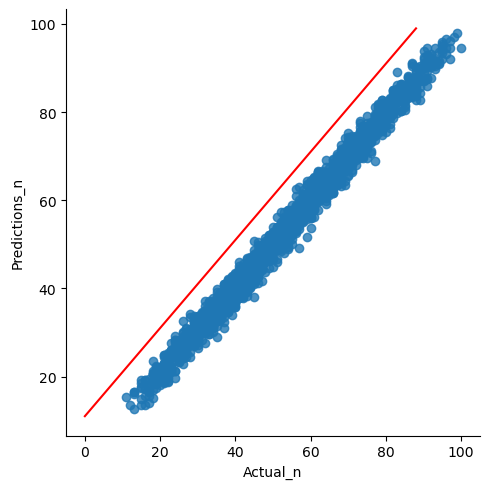

In [514]:
sns.lmplot(x="Actual_n",y="Predictions_n",data=df_new,fit_reg=False)
d_line=np.arange(df_new.min().min(),df_new.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

In [515]:
list1=["Linear Regression","Lasso","Ridge","Feature_SelectionModel"]
list2=[R2,l1_R2,rd_R2,new_R2]
list3=[Adj_R2,l1_adj_R2,rd_adj_R2,Anew_R2]
list4=[MSE,MSE_l1,MSE_rd,new_MSE]

In [516]:
Final_Result=pd.DataFrame({"Model_Name":list1,"R2_value":list2,"Adj_R2":list3,"MSE":list4})
Final_Result

,Model_Name,R2_value,Adj_R2,MSE
0,Linear Regression,0.988711,0.988704,4.091043
1,Lasso,0.986785,0.986777,4.718953
2,Ridge,0.988711,0.988704,4.091025
3,Feature_SelectionModel,0.987590,0.987586,4.470622


In [ ]:
#Conclusion:

#The Linear Regression and Ridge models are the best, showing identical Rsquare, adjusted Rsquare, and MSE values.
#In comparison, the Lasso and Feature Selection Model show slightly lower performance with R-squared values of 0.986785 and 0.987590, as well as higher MSEs.
#In summary, the high accuracy and adjusted R-squared value confirm that the linear regression model and Ridge is both reliable and capable of providing meaningful insights for prediction.